In [1]:
import pandas as pd
import time

In [2]:
top_league_footballer_df = pd.read_csv('footballer_visualization.csv', low_memory = False)

In [3]:
columns_to_drop = ['Nation_x','Pos_x','Age_x','Url_x','ID',"Season_End_Year_y",'Squad_y',
                   'Comp_y', 'Player_y', 'Nation_y', 'Pos_y','Age_y','Born_y','Mins_Per_90_x','Url_y','Mins_Per_90_y','Ast_y',
                  'xG_Expected_y','npxG_Expected_y','Season_End_Year','Squad','Comp', 'Player','Nation','Pos','Born',
                  'Url','Squad_Year','Value','total_teams_in_league']
top_league_footballer_df.drop(columns=columns_to_drop, inplace=True)

# Start Visualization

## Visualization for player valuation in each league and each season

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
market_value_over_year = top_league_footballer_df.groupby(['Season', 'Compe']).agg({'Price': 'mean'}).reset_index()

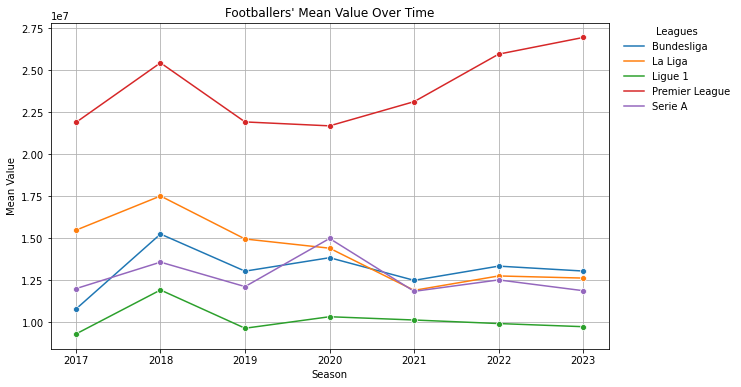

In [6]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot with customized line styles and markers
hue_plot = sns.lineplot(data=market_value_over_year, x="Season", y="Price", hue="Compe", linestyle='-', marker='o')

# Add grid lines
plt.grid(True)

# Adjust title and axes labels
hue_plot.set(title="Footballers' Mean Value Over Time", xlabel="Season", ylabel="Mean Value")

# Customize legend
plt.legend(title='Leagues', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, frameon=False)

# Show the plot
plt.show()

In [7]:
rank_correlation = top_league_footballer_df.groupby(['Rk','Squad_x']).agg({'Price': 'mean'}).reset_index()

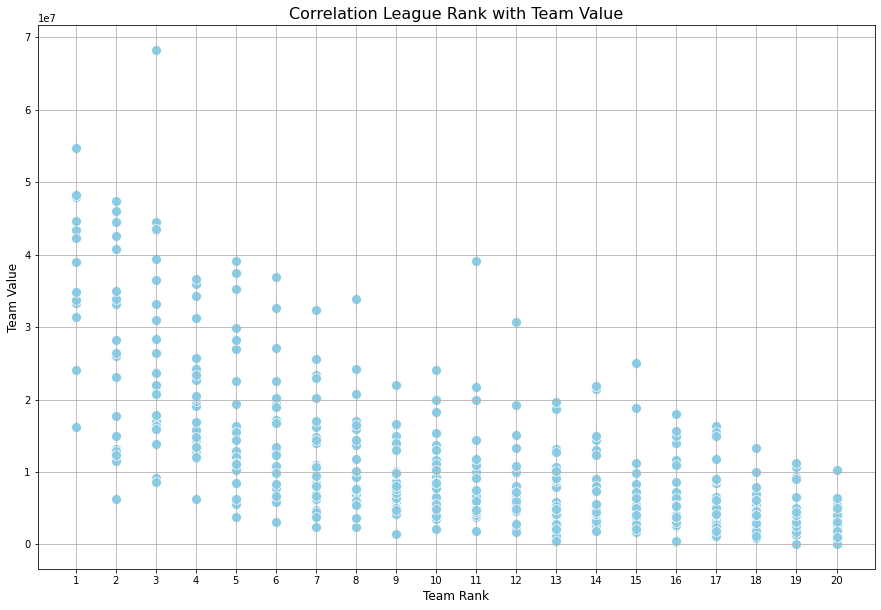

In [8]:
plt.figure(figsize=(15, 10))

# Plot with customized markers
scatter_plot = sns.scatterplot(data=rank_correlation,x="Rk", y="Price", marker='o', s=100, color='skyblue')

# Add grid lines
plt.grid(True)

# Adjust title and axes labels
plt.title('Correlation League Rank with Team Value', fontsize=16)
plt.xlabel('Team Rank', fontsize=12)
plt.ylabel('Team Value', fontsize=12)

plt.xticks(range(1, 21))

# Show the plot
plt.show()

In [9]:
top_league_footballer_df.drop(columns=["Squad_x"], inplace=True)

In [10]:
top_league_footballer_df.groupby(['Season', 'Compe']).agg({'Name': 'count'}).reset_index()

,Season,Compe,Name
0,2017,Bundesliga,244
1,2017,La Liga,233
2,2017,Ligue 1,205
3,2017,Premier League,221
4,2017,Serie A,264
5,2018,Bundesliga,237
6,2018,La Liga,244
7,2018,Ligue 1,196
8,2018,Premier League,265
9,2018,Serie A,293


## Visualization for checking player value inflation over years

In [11]:
inflation_value_over_year = top_league_footballer_df.groupby('Season').agg({'Price': 'mean'}).reset_index()
inflation_value_over_year

,Season,Price
0,2017,1.384981e+07
1,2018,1.696761e+07
2,2019,1.455661e+07
3,2020,1.514629e+07
4,2021,1.362195e+07
5,2022,1.494913e+07
6,2023,1.513575e+07


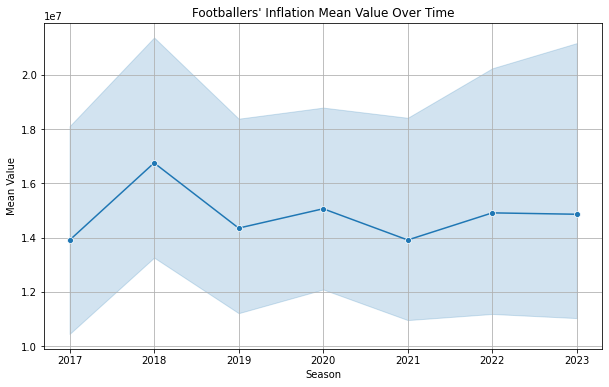

In [12]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot with customized line styles and markers
hue_plot = sns.lineplot(data=market_value_over_year, x="Season", y="Price", linestyle='-', marker='o')

# Add grid lines
plt.grid(True)

# Adjust title and axes labels
hue_plot.set(title="Footballers' Inflation Mean Value Over Time", xlabel="Season", ylabel="Mean Value")

# Show the plot
plt.show()

## Visualization for player valuation in each position

In [13]:
top_league_footballer_df

,Season,Compe,Name,Born_x,MP_Playing,Starts_Playing,Min_Playing,Mins_Per_90_Playing,Gls,Ast_x,...,PrgC_Carries,Final_Third_Carries,CPA_Carries,Mis_Carries,Dis_Carries,Rec_Receiving,PrgR_Receiving,Rk,Position,Price
0,2017,La Liga,Burgui,1993.0,23.0,12.0,1034.0,11.5,1.0,0.0,...,35.0,17.0,14.0,23.0,17.0,348.0,75.0,14.0,Left Winger,1800000.0
1,2017,La Liga,Rodrigo Ely,1993.0,31.0,30.0,2691.0,29.9,1.0,0.0,...,6.0,1.0,0.0,9.0,3.0,635.0,7.0,14.0,Centre-Back,6000000.0
2,2017,La Liga,Manu García,1986.0,30.0,27.0,2439.0,27.1,3.0,0.0,...,15.0,12.0,1.0,28.0,28.0,761.0,48.0,14.0,Central Midfield,1800000.0
3,2017,La Liga,Ibai Gómez,1989.0,34.0,26.0,2319.0,25.8,7.0,6.0,...,22.0,38.0,9.0,49.0,52.0,788.0,117.0,14.0,Left Winger,3500000.0
4,2017,La Liga,Munir El Haddadi,1995.0,33.0,28.0,2444.0,27.2,10.0,6.0,...,48.0,42.0,14.0,90.0,87.0,779.0,173.0,14.0,Right Winger,12000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9161,2023,Bundesliga,Jakub Kaminski,2002.0,13.0,3.0,296.0,3.3,0.0,0.0,...,8.0,3.0,5.0,3.0,9.0,99.0,31.0,13.0,Left Winger,7000000.0
9162,2023,Bundesliga,Joakim Maehle,1997.0,23.0,22.0,1932.0,21.5,2.0,3.0,...,63.0,43.0,7.0,25.0,12.0,811.0,105.0,13.0,Right-Back,14000000.0
9163,2023,Bundesliga,Cédric Zesiger,1998.0,15.0,12.0,1068.0,11.9,0.0,0.0,...,10.0,7.0,0.0,1.0,2.0,597.0,1.0,13.0,Centre-Back,6000000.0
9164,2023,Premier League,Rayan Aït-Nouri,2001.0,24.0,21.0,1705.0,18.9,1.0,1.0,...,51.0,38.0,7.0,34.0,35.0,736.0,78.0,9.0,Left-Back,32000000.0


In [14]:
top_league_footballer_df= top_league_footballer_df[top_league_footballer_df['Position'] != 'Goalkeeper']
top_league_footballer_df

,Season,Compe,Name,Born_x,MP_Playing,Starts_Playing,Min_Playing,Mins_Per_90_Playing,Gls,Ast_x,...,PrgC_Carries,Final_Third_Carries,CPA_Carries,Mis_Carries,Dis_Carries,Rec_Receiving,PrgR_Receiving,Rk,Position,Price
0,2017,La Liga,Burgui,1993.0,23.0,12.0,1034.0,11.5,1.0,0.0,...,35.0,17.0,14.0,23.0,17.0,348.0,75.0,14.0,Left Winger,1800000.0
1,2017,La Liga,Rodrigo Ely,1993.0,31.0,30.0,2691.0,29.9,1.0,0.0,...,6.0,1.0,0.0,9.0,3.0,635.0,7.0,14.0,Centre-Back,6000000.0
2,2017,La Liga,Manu García,1986.0,30.0,27.0,2439.0,27.1,3.0,0.0,...,15.0,12.0,1.0,28.0,28.0,761.0,48.0,14.0,Central Midfield,1800000.0
3,2017,La Liga,Ibai Gómez,1989.0,34.0,26.0,2319.0,25.8,7.0,6.0,...,22.0,38.0,9.0,49.0,52.0,788.0,117.0,14.0,Left Winger,3500000.0
4,2017,La Liga,Munir El Haddadi,1995.0,33.0,28.0,2444.0,27.2,10.0,6.0,...,48.0,42.0,14.0,90.0,87.0,779.0,173.0,14.0,Right Winger,12000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9161,2023,Bundesliga,Jakub Kaminski,2002.0,13.0,3.0,296.0,3.3,0.0,0.0,...,8.0,3.0,5.0,3.0,9.0,99.0,31.0,13.0,Left Winger,7000000.0
9162,2023,Bundesliga,Joakim Maehle,1997.0,23.0,22.0,1932.0,21.5,2.0,3.0,...,63.0,43.0,7.0,25.0,12.0,811.0,105.0,13.0,Right-Back,14000000.0
9163,2023,Bundesliga,Cédric Zesiger,1998.0,15.0,12.0,1068.0,11.9,0.0,0.0,...,10.0,7.0,0.0,1.0,2.0,597.0,1.0,13.0,Centre-Back,6000000.0
9164,2023,Premier League,Rayan Aït-Nouri,2001.0,24.0,21.0,1705.0,18.9,1.0,1.0,...,51.0,38.0,7.0,34.0,35.0,736.0,78.0,9.0,Left-Back,32000000.0


In [15]:
top_league_footballer_df['Position'].unique()

array(['Left Winger', 'Centre-Back', 'Central Midfield', 'Right Winger',
       'Left-Back', 'Attacking Midfield', 'Centre-Forward', 'Right-Back',
       'Defensive Midfield', 'Left Midfield', 'Right Midfield',
       'Second Striker'], dtype=object)

In [16]:
def classify_positions(position):
    defender_positions = ['Centre-Back', 'Right-Back', 'Left-Back']
    midfielder_positions = ['Defensive Midfield', 'Central Midfield', 
                             'Attacking Midfield', 'Left Midfield', 'Right Midfield']
    attacker_positions = ['Centre-Forward', 'Second Striker', "Right Winger", 'Left Winger' ]

    if position in defender_positions:
        return 'Defender'
    elif position in midfielder_positions:
        return 'Midfielder'
    elif position in attacker_positions:
        return 'Attacker'

In [17]:
top_league_footballer_df['Position_Category'] = top_league_footballer_df['Position'].apply(classify_positions)

C:\Users\russe\AppData\Local\Temp/ipykernel_24936/1449609358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_league_footballer_df['Position_Category'] = top_league_footballer_df['Position'].apply(classify_positions)


In [18]:
market_value_category_position = top_league_footballer_df.groupby(['Position_Category','Season']).agg({'Price': 'mean'}).reset_index()

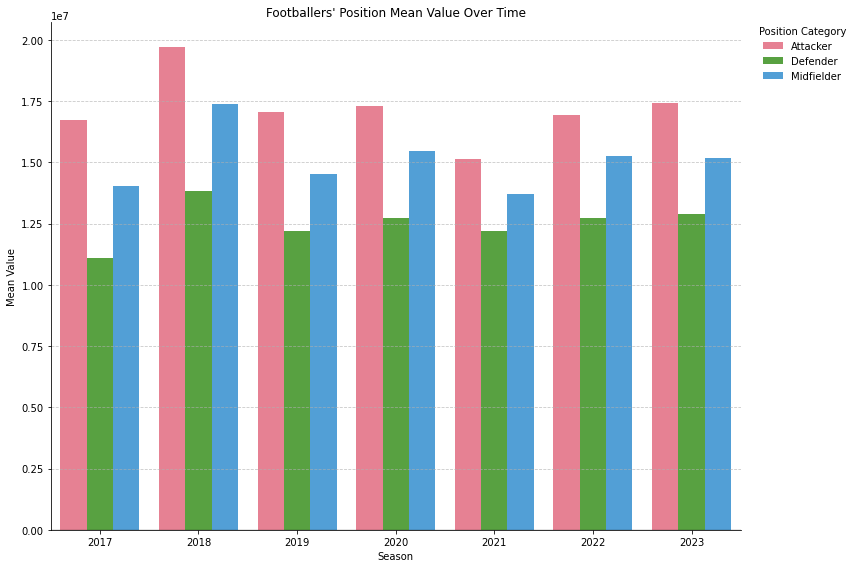

In [19]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Use a seaborn color palette for better aesthetics
color_palette = sns.color_palette("husl", n_colors=len(market_value_category_position['Position_Category'].unique()))

# Plot with customized line styles and markers
hue_plot = sns.barplot(data=market_value_category_position, x="Season", y="Price", hue="Position_Category", palette=color_palette)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust title and axes labels
hue_plot.set(title="Footballers' Position Mean Value Over Time", xlabel="Season", ylabel="Mean Value")

# Customize legend
plt.legend(title='Position Category', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, frameon=False)

# Add a horizontal line at y=0 for better clarity
plt.axhline(0, color='black', linewidth=1.3, alpha=0.7)

# Remove top and right spines for cleaner look
sns.despine()

# Add data labels on top of each bar for better readability
# for p in hue_plot.patches:
#     hue_plot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Adjust plot layout
plt.tight_layout()

# Show the plot
plt.show()


## Visualization for Player Position Distribution

In [20]:
number_positions =  top_league_footballer_df.groupby('Position_Category').size().reset_index(name='counts')
number_positions

,Position_Category,counts
0,Attacker,2957
1,Defender,3109
2,Midfielder,3092


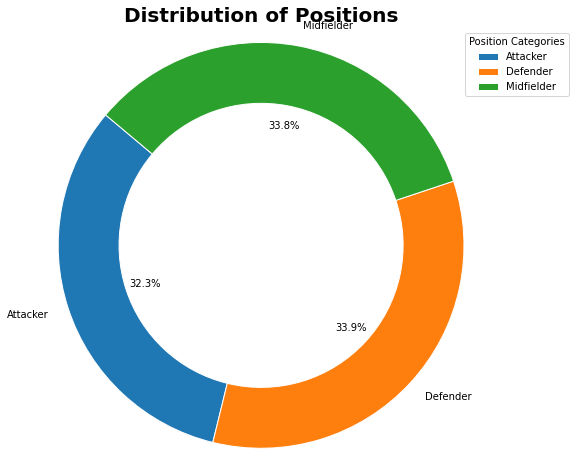

In [21]:
plt.figure(figsize=(8, 8))

# Create a pie chart with additional styling
plt.pie(number_positions['counts'],
        labels=number_positions['Position_Category'],
        autopct='%1.1f%%',
        startangle=140,
        wedgeprops=dict(width=0.3, edgecolor='w'))  # Added wedgeprops for a donut-like appearance

# Add a title
plt.title('Distribution of Positions', fontsize=20, weight='bold')

# Add legend
plt.legend(title='Position Categories', loc='upper right', bbox_to_anchor=(1.2, 1))

# Set aspect ratio to be equal, making the pie chart a circle
plt.axis('equal')

# Show the plot
plt.show()

### Attacker

#### The amount of player with position of second striker is too little, so we combine both of the second striker and centre forward

In [22]:
top_league_footballer_df['Position'] = top_league_footballer_df['Position'].replace('Second Striker', 'Centre-Forward')

C:\Users\russe\AppData\Local\Temp/ipykernel_24936/3842555164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_league_footballer_df['Position'] = top_league_footballer_df['Position'].replace('Second Striker', 'Centre-Forward')


In [23]:
attacker_df = top_league_footballer_df[top_league_footballer_df['Position_Category'] == 'Attacker']

In [24]:
attacker_category_position = attacker_df.groupby(['Position','Season']).agg({'Price': 'mean'}).reset_index()

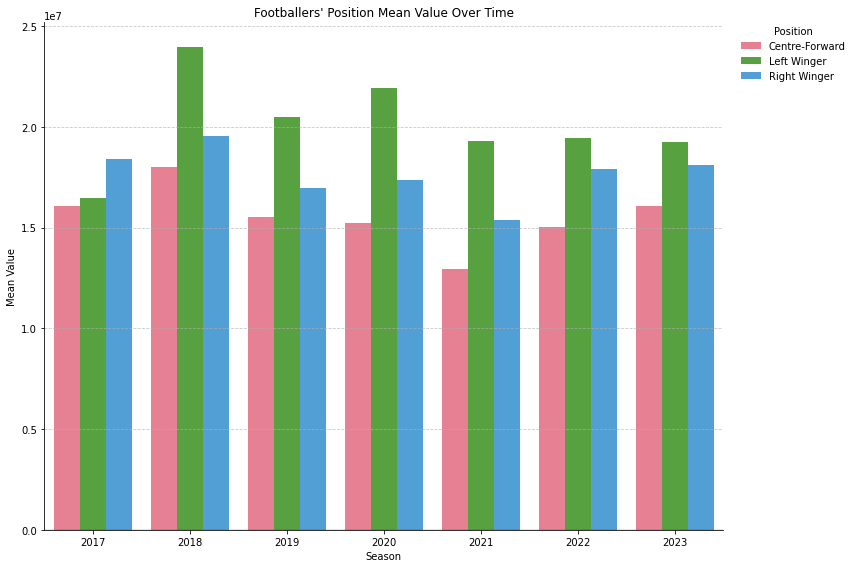

In [25]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Use a seaborn color palette for better aesthetics
color_palette = sns.color_palette("husl", n_colors=len(attacker_category_position['Position'].unique()))

# Plot with customized line styles and markers
hue_plot = sns.barplot(data=attacker_category_position, x="Season", y="Price", hue="Position", palette=color_palette)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust title and axes labels
hue_plot.set(title="Footballers' Position Mean Value Over Time", xlabel="Season", ylabel="Mean Value")

# Customize legend
plt.legend(title='Position', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, frameon=False)

# Add a horizontal line at y=0 for better clarity
plt.axhline(0, color='black', linewidth=1.3, alpha=0.7)

# Remove top and right spines for cleaner look
sns.despine()

# Add data labels on top of each bar for better readability
# for p in hue_plot.patches:
#     hue_plot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Adjust plot layout
plt.tight_layout()

# Show the plot
plt.show()


In [26]:
attacker_df[(attacker_df['Position'] == 'Centre-Forward') & (attacker_df['Season'] == "2018")].sort_values(by='Price', ascending=False)
attacker_df['Position'].value_counts()

Centre-Forward    1499
Right Winger       735
Left Winger        723
Name: Position, dtype: int64

## Attacker Players Position Distribution

In [27]:
number_positions_attacker =  attacker_df.groupby('Position').size().reset_index(name='counts')
number_positions_attacker

,Position,counts
0,Centre-Forward,1499
1,Left Winger,723
2,Right Winger,735


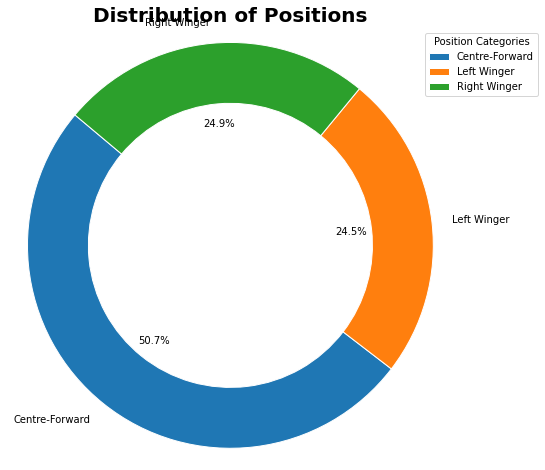

In [28]:
plt.figure(figsize=(8, 8))

# Create a pie chart with additional styling
plt.pie(number_positions_attacker['counts'],
        labels=number_positions_attacker['Position'],
        autopct='%1.1f%%',
        startangle=140,
        wedgeprops=dict(width=0.3, edgecolor='w'))  # Added wedgeprops for a donut-like appearance

# Add a title
plt.title('Distribution of Positions', fontsize=20, weight='bold')

# Add legend
plt.legend(title='Position Categories', loc='upper right', bbox_to_anchor=(1.2, 1))

# Set aspect ratio to be equal, making the pie chart a circle
plt.axis('equal')

# Show the plot
plt.show()

In [29]:
# plt.figure(figsize=(45,45))
# sns.heatmap(attacker_df.corr(),annot=True)
# plt.show()

In [30]:
attacker_corr =attacker_df.corr().reset_index().rename(columns={'index': 'variable'})

C:\Users\russe\AppData\Local\Temp/ipykernel_24936/2157043637.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  attacker_corr =attacker_df.corr().reset_index().rename(columns={'index': 'variable'})


In [31]:
attacker_corr1 = attacker_corr[attacker_corr.variable=='Price']
attacker_corr1.drop('variable', axis=1, inplace=True)
attacker_corr1

C:\Users\russe\AppData\Local\Temp/ipykernel_24936/1410411634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attacker_corr1.drop('variable', axis=1, inplace=True)


,Season,Born_x,MP_Playing,Starts_Playing,Min_Playing,Mins_Per_90_Playing,Gls,Ast_x,G+A,G_minus_PK,...,PrgDist_Carries,PrgC_Carries,Final_Third_Carries,CPA_Carries,Mis_Carries,Dis_Carries,Rec_Receiving,PrgR_Receiving,Rk,Price
138,-0.016485,0.119181,0.305007,0.422987,0.429652,0.429602,0.606466,0.512504,0.650062,0.613264,...,0.513856,0.522147,0.499937,0.607033,0.362397,0.408747,0.532914,0.563661,-0.460039,1.0


In [32]:
attacker_corr1.iloc[0].sort_values(ascending=False)

Price                     1.000000
G+A                       0.650062
npxG+xAG_Expected         0.632390
Att Pen_Touches           0.625288
GCA_GCA                   0.621215
                            ...   
Season                   -0.016485
Tkl_percent_Challenges   -0.042892
Dist_Standard            -0.052699
Tkld_percent_Take        -0.093503
Rk                       -0.460039
Name: 138, Length: 139, dtype: float64

In [33]:
top_10_values_att = attacker_corr1.iloc[0].sort_values(ascending=False)[1:11]
column_names_att = top_10_values_att.index.tolist()

In [34]:
top_25_values_att = attacker_corr1.iloc[0].sort_values(ascending=False)[1:26]
column_names_att_25 = top_25_values_att.index.tolist()

In [35]:
top_10_values_att

G+A                  0.650062
npxG+xAG_Expected    0.632390
Att Pen_Touches      0.625288
GCA_GCA              0.621215
G_minus_PK           0.613264
CPA_Carries          0.607033
Gls_Standard         0.606466
Gls                  0.606466
SoT_Standard         0.606143
npxG_Expected_x      0.582774
Name: 138, dtype: float64

### Midfielder

#### The amount of left and right midfielder is too little and we can call it as a central midfield since the actual name for left/right midfield is also left/right central midfield

In [36]:
top_league_footballer_df['Position'] = top_league_footballer_df['Position'].replace({
    'Left Midfield': 'Central Midfield',
    'Right Midfield': 'Central Midfield'
})

C:\Users\russe\AppData\Local\Temp/ipykernel_24936/1782356819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_league_footballer_df['Position'] = top_league_footballer_df['Position'].replace({


In [37]:
midfielder_df = top_league_footballer_df[top_league_footballer_df['Position_Category'] == 'Midfielder']

In [38]:
midfielder_category_position = midfielder_df.groupby(['Position','Season']).agg({'Price': 'mean'}).reset_index()

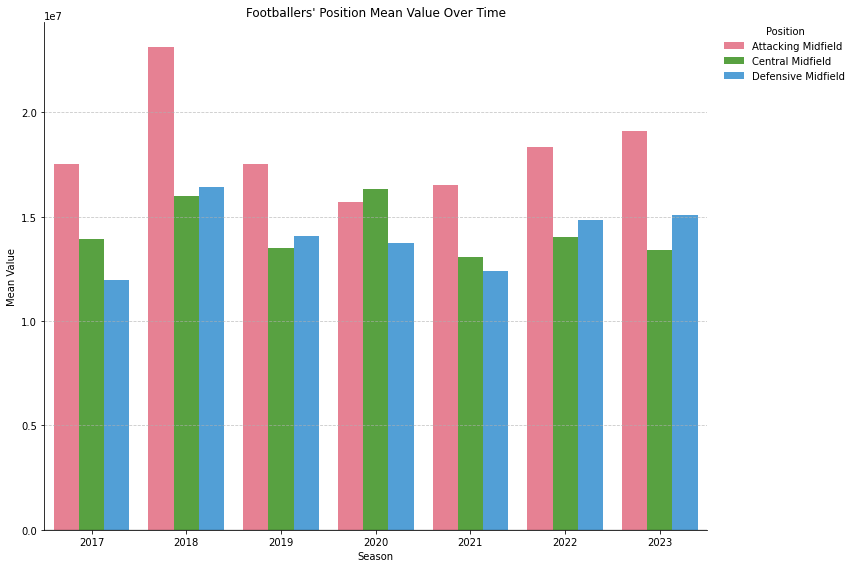

In [39]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Use a seaborn color palette for better aesthetics
color_palette = sns.color_palette("husl", n_colors=len(midfielder_category_position['Position'].unique()))

# Plot with customized line styles and markers
hue_plot = sns.barplot(data=midfielder_category_position, x="Season", y="Price", hue="Position", palette=color_palette)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust title and axes labels
hue_plot.set(title ="Footballers' Position Mean Value Over Time", xlabel="Season", ylabel="Mean Value")

# Customize legend
plt.legend(title='Position', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, frameon=False)

# Add a horizontal line at y=0 for better clarity
plt.axhline(0, color='black', linewidth=1.3, alpha=0.7)

# Remove top and right spines for cleaner look
sns.despine()

# Add data labels on top of each bar for better readability
# for p in hue_plot.patches:
#     hue_plot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Adjust plot layout
plt.tight_layout()

# Show the plot
plt.show()


In [40]:
midfielder_df['Position'].value_counts()

Central Midfield      1557
Defensive Midfield     841
Attacking Midfield     694
Name: Position, dtype: int64

## Midfielder player position distribution

In [41]:
number_positions_midfielder =  midfielder_df.groupby('Position').size().reset_index(name='counts')
number_positions_midfielder

,Position,counts
0,Attacking Midfield,694
1,Central Midfield,1557
2,Defensive Midfield,841


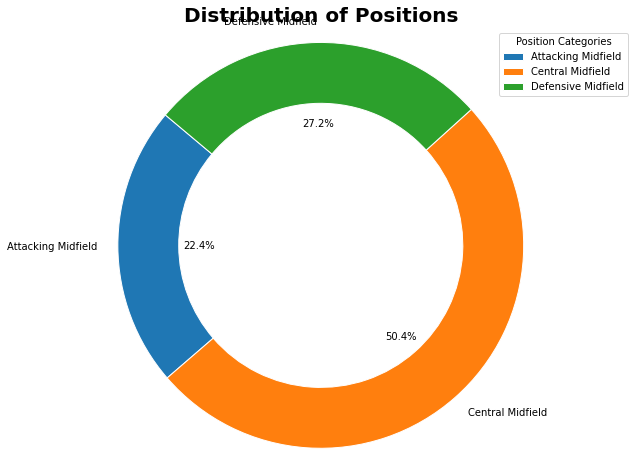

In [42]:
plt.figure(figsize=(8, 8))

# Create a pie chart with additional styling
plt.pie(number_positions_midfielder['counts'],
        labels=number_positions_midfielder['Position'],
        autopct='%1.1f%%',
        startangle=140,
        wedgeprops=dict(width=0.3, edgecolor='w'))  # Added wedgeprops for a donut-like appearance

# Add a title
plt.title('Distribution of Positions', fontsize=20, weight='bold')

# Add legend
plt.legend(title='Position Categories', loc='upper right', bbox_to_anchor=(1.2, 1))

# Set aspect ratio to be equal, making the pie chart a circle
plt.axis('equal')

# Show the plot
plt.show()

In [43]:
midfielder_corr =midfielder_df.corr().reset_index().rename(columns={'index': 'variable'})

C:\Users\russe\AppData\Local\Temp/ipykernel_24936/2525809564.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  midfielder_corr =midfielder_df.corr().reset_index().rename(columns={'index': 'variable'})


In [44]:
midfielder_corr1 = midfielder_corr[midfielder_corr.variable=='Price']
midfielder_corr1.drop('variable', axis=1, inplace=True)
midfielder_corr1

C:\Users\russe\AppData\Local\Temp/ipykernel_24936/695123411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midfielder_corr1.drop('variable', axis=1, inplace=True)


,Season,Born_x,MP_Playing,Starts_Playing,Min_Playing,Mins_Per_90_Playing,Gls,Ast_x,G+A,G_minus_PK,...,PrgDist_Carries,PrgC_Carries,Final_Third_Carries,CPA_Carries,Mis_Carries,Dis_Carries,Rec_Receiving,PrgR_Receiving,Rk,Price
138,-0.00625,0.175195,0.28054,0.339801,0.345591,0.345568,0.43472,0.420395,0.487645,0.442293,...,0.49159,0.452138,0.492836,0.385645,0.348341,0.371597,0.501834,0.38243,-0.455559,1.0


In [45]:
midfielder_corr1.iloc[0].sort_values(ascending=False)

Price                     1.000000
Att 3rd_Touches           0.522520
PassLive_GCA              0.518392
GCA_GCA                   0.506922
PassLive_SCA              0.503152
                            ...   
Season                   -0.006250
Tkl_percent_Challenges   -0.018874
Dist_Standard            -0.034236
Tkld_percent_Take        -0.068481
Rk                       -0.455559
Name: 138, Length: 139, dtype: float64

In [46]:
top_10_values_mid = midfielder_corr1.iloc[0].sort_values(ascending=False)[1:11]
column_names_mid = top_10_values_mid.index.tolist()

In [47]:
top_10_values_mid

Att 3rd_Touches        0.522520
PassLive_GCA           0.518392
GCA_GCA                0.506922
PassLive_SCA           0.503152
Rec_Receiving          0.501834
Cmp_Short              0.495054
Att_Short              0.492892
Final_Third_Carries    0.492836
PrgDist_Carries        0.491590
PPA                    0.488840
Name: 138, dtype: float64

### Defender

In [48]:
defender_df = top_league_footballer_df[top_league_footballer_df['Position_Category'] == 'Defender']

In [49]:
defender_category_position = defender_df.groupby(['Position','Season']).agg({'Price': 'mean'}).reset_index()

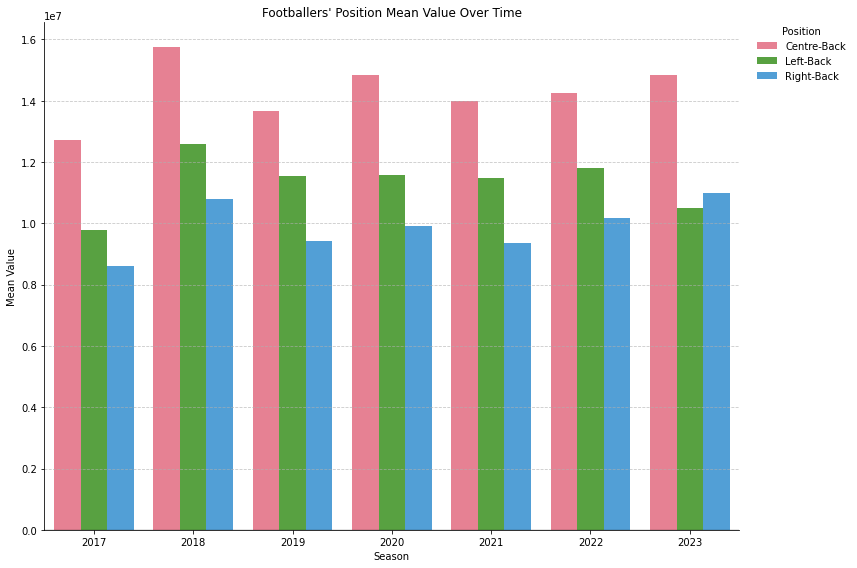

In [50]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Use a seaborn color palette for better aesthetics
color_palette = sns.color_palette("husl", n_colors=len(defender_category_position['Position'].unique()))

# Plot with customized line styles and markers
hue_plot = sns.barplot(data=defender_category_position, x="Season", y="Price", hue="Position", palette=color_palette)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust title and axes labels
hue_plot.set(title="Footballers' Position Mean Value Over Time", xlabel="Season", ylabel="Mean Value")

# Customize legend
plt.legend(title='Position', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, frameon=False)

# Add a horizontal line at y=0 for better clarity
plt.axhline(0, color='black', linewidth=1.3, alpha=0.7)

# Remove top and right spines for cleaner look
sns.despine()

# Add data labels on top of each bar for better readability
# for p in hue_plot.patches:
#     hue_plot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Adjust plot layout
plt.tight_layout()

# Show the plot
plt.show()


In [51]:
defender_df[(defender_df['Position'] == 'Centre-Back') & (defender_df['Season'] == 2018)].sort_values(by='Price', ascending=False)

,Season,Compe,Name,Born_x,MP_Playing,Starts_Playing,Min_Playing,Mins_Per_90_Playing,Gls,Ast_x,...,Final_Third_Carries,CPA_Carries,Mis_Carries,Dis_Carries,Rec_Receiving,PrgR_Receiving,Rk,Position,Price,Position_Category
1650,2018,Premier League,Virgil van Dijk,1991.0,38.0,38.0,3384.0,37.6,4.0,2.0,...,21.0,2.0,7.0,1.0,2421.0,20.0,2.0,Centre-Back,90000000.0,Defender
1818,2018,Serie A,Kalidou Koulibaly,1991.0,35.0,35.0,3132.0,34.8,2.0,2.0,...,39.0,2.0,17.0,9.0,2082.0,15.0,2.0,Centre-Back,75000000.0,Defender
1709,2018,Premier League,Aymeric Laporte,1994.0,35.0,34.0,3057.0,34.0,3.0,3.0,...,81.0,1.0,11.0,2.0,2617.0,9.0,1.0,Centre-Back,75000000.0,Defender
1935,2018,La Liga,Raphaël Varane,1993.0,32.0,31.0,2754.0,30.6,2.0,0.0,...,14.0,1.0,13.0,7.0,1342.0,3.0,3.0,Centre-Back,70000000.0,Defender
1154,2018,La Liga,José María Giménez,1995.0,21.0,19.0,1772.0,19.7,0.0,0.0,...,4.0,0.0,9.0,2.0,515.0,1.0,2.0,Centre-Back,70000000.0,Defender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,2018,Serie A,Fabio Pisacane,1986.0,27.0,24.0,2266.0,25.2,1.0,1.0,...,4.0,0.0,14.0,6.0,815.0,4.0,15.0,Centre-Back,700000.0,Defender
1444,2018,Serie A,Nicolò Brighenti,1989.0,11.0,11.0,990.0,11.0,0.0,0.0,...,4.0,0.0,5.0,2.0,383.0,10.0,19.0,Centre-Back,500000.0,Defender
1386,2018,Serie A,Domenico Maietta,1982.0,21.0,21.0,1714.0,19.0,0.0,0.0,...,20.0,1.0,7.0,1.0,745.0,4.0,18.0,Centre-Back,300000.0,Defender
1551,2018,La Liga,Adrián Diéguez,1996.0,9.0,8.0,749.0,8.3,0.0,0.0,...,3.0,0.0,8.0,1.0,117.0,0.0,19.0,Centre-Back,300000.0,Defender


## Defender player position distribution

In [52]:
number_positions_defender =  defender_df.groupby('Position').size().reset_index(name='counts')
number_positions_defender

,Position,counts
0,Centre-Back,1638
1,Left-Back,673
2,Right-Back,798


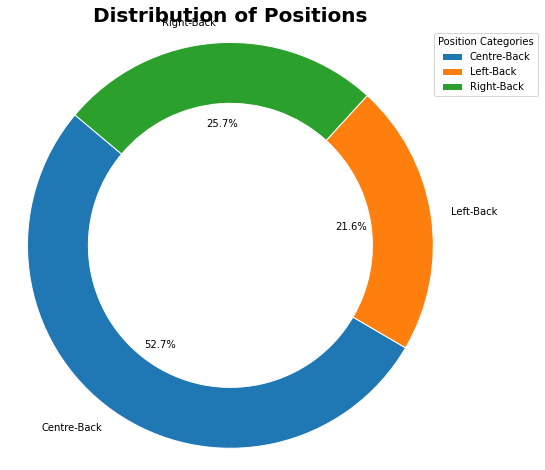

In [53]:
plt.figure(figsize=(8, 8))

# Create a pie chart with additional styling
plt.pie(number_positions_defender['counts'],
        labels=number_positions_defender['Position'],
        autopct='%1.1f%%',
        startangle=140,
        wedgeprops=dict(width=0.3, edgecolor='w'))  # Added wedgeprops for a donut-like appearance

# Add a title
plt.title('Distribution of Positions', fontsize=20, weight='bold')

# Add legend
plt.legend(title='Position Categories', loc='upper right', bbox_to_anchor=(1.2, 1))

# Set aspect ratio to be equal, making the pie chart a circle
plt.axis('equal')

# Show the plot
plt.show()

In [54]:
defender_corr =defender_df.corr().reset_index().rename(columns={'index': 'variable'})

C:\Users\russe\AppData\Local\Temp/ipykernel_24936/2700741936.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  defender_corr =defender_df.corr().reset_index().rename(columns={'index': 'variable'})


In [55]:
defender_corr1 = defender_corr[defender_corr.variable=='Price']
defender_corr1.drop('variable', axis=1, inplace=True)
defender_corr1

C:\Users\russe\AppData\Local\Temp/ipykernel_24936/2780773648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defender_corr1.drop('variable', axis=1, inplace=True)


,Season,Born_x,MP_Playing,Starts_Playing,Min_Playing,Mins_Per_90_Playing,Gls,Ast_x,G+A,G_minus_PK,...,PrgDist_Carries,PrgC_Carries,Final_Third_Carries,CPA_Carries,Mis_Carries,Dis_Carries,Rec_Receiving,PrgR_Receiving,Rk,Price
138,0.014716,0.240769,0.25688,0.286076,0.287466,0.287466,0.242997,0.209997,0.287194,0.25163,...,0.488517,0.221523,0.247173,0.180332,0.110999,0.09703,0.535774,0.142316,-0.491551,1.0


In [56]:
defender_corr1.iloc[0].sort_values(ascending=False)

Price                   1.000000
Rec_Receiving           0.535774
Cmp_Total               0.524239
Cmp_Outcomes            0.524239
Carries_Carries         0.521050
                          ...   
TI_Pass                -0.014368
SoT_percent_Standard   -0.072127
Tkld_percent_Take      -0.080275
Dist_Standard          -0.121984
Rk                     -0.491551
Name: 138, Length: 139, dtype: float64

In [57]:
top_10_values_def = defender_corr1.iloc[0].sort_values(ascending=False)[1:11]
column_names_def = top_10_values_def.index.tolist()

In [58]:
top_10_values_def

Rec_Receiving      0.535774
Cmp_Total          0.524239
Cmp_Outcomes       0.524239
Carries_Carries    0.521050
Live_Pass          0.510693
Cmp_Short          0.494346
TotDist_Total      0.488623
PrgDist_Carries    0.488517
Mid 3rd_Touches    0.488218
Att                0.487440
Name: 138, dtype: float64

## Visualize the price value based on the age

In [59]:
top_league_footballer_df['Age'] = top_league_footballer_df['Season']-top_league_footballer_df['Born_x']

C:\Users\russe\AppData\Local\Temp/ipykernel_24936/4276332468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_league_footballer_df['Age'] = top_league_footballer_df['Season']-top_league_footballer_df['Born_x']


In [60]:
top_league_footballer_df['Age'].describe()

count    9158.000000
mean       25.873226
std         4.127431
min        16.000000
25%        23.000000
50%        26.000000
75%        29.000000
max        41.000000
Name: Age, dtype: float64

In [61]:
footballer_value_by_age = top_league_footballer_df.groupby('Age').agg({'Price': 'mean'}).reset_index()
footballer_value_by_age

,Age,Price
0,16.0,2.925000e+07
1,17.0,1.647632e+07
2,18.0,1.488893e+07
3,19.0,1.413526e+07
4,20.0,1.712717e+07
5,21.0,1.765493e+07
6,22.0,1.846892e+07
7,23.0,1.826253e+07
8,24.0,1.835705e+07
9,25.0,1.798504e+07


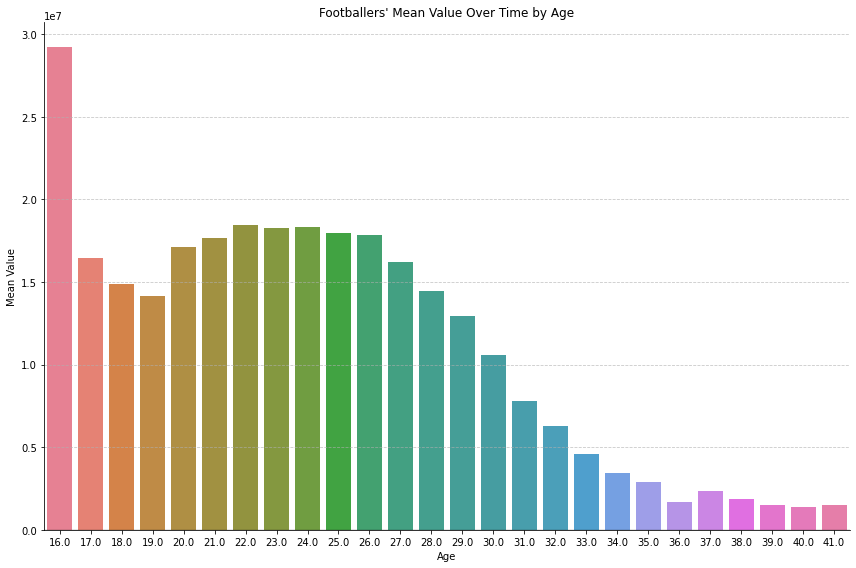

In [62]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Use a seaborn color palette for better aesthetics
color_palette = sns.color_palette("husl", n_colors=len(footballer_value_by_age['Age'].unique()))

# Plot with customized line styles and markers
hue_plot = sns.barplot(data=footballer_value_by_age, x="Age", y="Price", palette=color_palette)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust title and axes labels
hue_plot.set(title="Footballers' Mean Value Over Time by Age", xlabel="Age", ylabel="Mean Value")


# Add a horizontal line at y=0 for better clarity
plt.axhline(0, color='black', linewidth=1.3, alpha=0.7)

# Remove top and right spines for cleaner look
sns.despine()

# Add data labels on top of each bar for better readability
# for p in hue_plot.patches:
#     hue_plot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Adjust plot layout
plt.tight_layout()

# Show the plot
plt.show()


In [63]:
number_players_per_age =  top_league_footballer_df.groupby('Age').size().reset_index(name='counts')
number_players_per_age

,Age,counts
0,16.0,4
1,17.0,38
2,18.0,131
3,19.0,268
4,20.0,415
5,21.0,553
6,22.0,695
7,23.0,760
8,24.0,801
9,25.0,812


In [64]:
high_corr_columns = list(set(column_names_att + column_names_def + column_names_mid + ['Rk','Age','Season','Compe','Position','Price']))

In [65]:
top_league_footballer_df_high_corr = top_league_footballer_df.loc[:, high_corr_columns]

In [66]:
top_league_footballer_df_high_corr

,GCA_GCA,Gls_Standard,Age,CPA_Carries,Cmp_Outcomes,Live_Pass,Cmp_Total,TotDist_Total,PrgDist_Carries,PassLive_GCA,...,G_minus_PK,PassLive_SCA,npxG_Expected_x,Compe,Att Pen_Touches,Final_Third_Carries,PPA,Rec_Receiving,Rk,Carries_Carries
0,4.0,1.0,24.0,14.0,271.0,341.0,271.0,4218.0,1061.0,3.0,...,1.0,36.0,0.7,La Liga,24.0,17.0,15.0,348.0,14.0,331.0
1,1.0,1.0,24.0,0.0,753.0,951.0,753.0,16921.0,1468.0,1.0,...,1.0,13.0,1.2,La Liga,30.0,1.0,1.0,635.0,14.0,596.0
2,5.0,3.0,31.0,1.0,731.0,984.0,731.0,12294.0,1284.0,5.0,...,3.0,32.0,1.8,La Liga,31.0,12.0,4.0,761.0,14.0,735.0
3,9.0,7.0,28.0,9.0,647.0,788.0,647.0,11177.0,1361.0,6.0,...,6.0,36.0,3.9,La Liga,47.0,38.0,22.0,788.0,14.0,715.0
4,12.0,10.0,22.0,14.0,471.0,604.0,471.0,6677.0,1260.0,7.0,...,10.0,55.0,9.1,La Liga,92.0,42.0,22.0,779.0,14.0,681.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9161,0.0,0.0,21.0,5.0,80.0,93.0,80.0,1201.0,239.0,0.0,...,0.0,4.0,0.3,Bundesliga,12.0,3.0,6.0,99.0,13.0,82.0
9162,8.0,2.0,26.0,7.0,975.0,987.0,975.0,14917.0,2287.0,6.0,...,2.0,41.0,1.2,Bundesliga,45.0,43.0,19.0,811.0,13.0,736.0
9163,1.0,0.0,25.0,0.0,642.0,715.0,642.0,12440.0,1525.0,1.0,...,0.0,4.0,0.9,Bundesliga,7.0,7.0,1.0,597.0,13.0,519.0
9164,2.0,1.0,22.0,7.0,747.0,784.0,747.0,10371.0,1808.0,1.0,...,1.0,34.0,1.9,Premier League,39.0,38.0,11.0,736.0,9.0,653.0


In [67]:
top_league_footballer_df_high_corr.to_csv("footballer_neural_network_high_corr.csv", index = False)

In [68]:
attacker = top_league_footballer_df[top_league_footballer_df['Position_Category']=='Attacker']

In [69]:
att_columns = list(set(column_names_att_25 + ['Rk','Age','Season','Compe','Position_Category','Position','Price']))

In [70]:
attacker = attacker.loc[:, att_columns]

In [71]:
attacker.to_csv("footballer_neural_network_att_high_corr.csv", index = False)

In [72]:
# top_league_footballer_df.drop(columns=['Name','Born_x'], inplace=True)

In [73]:
# top_league_footballer_df.to_csv("footballer_neural_network.csv", index = False)